In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

In [6]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

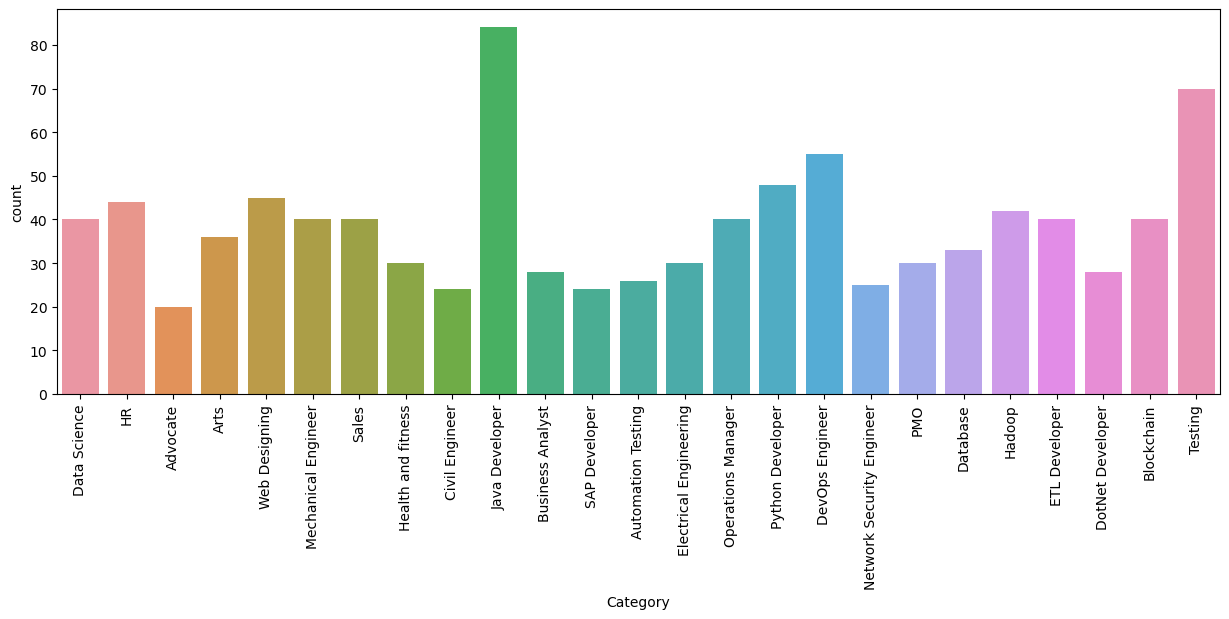

In [18]:
#df['Category'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x ='Category', data = df)
plt.xticks(rotation = 90)
plt.show()

In [24]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
len(labels)

25

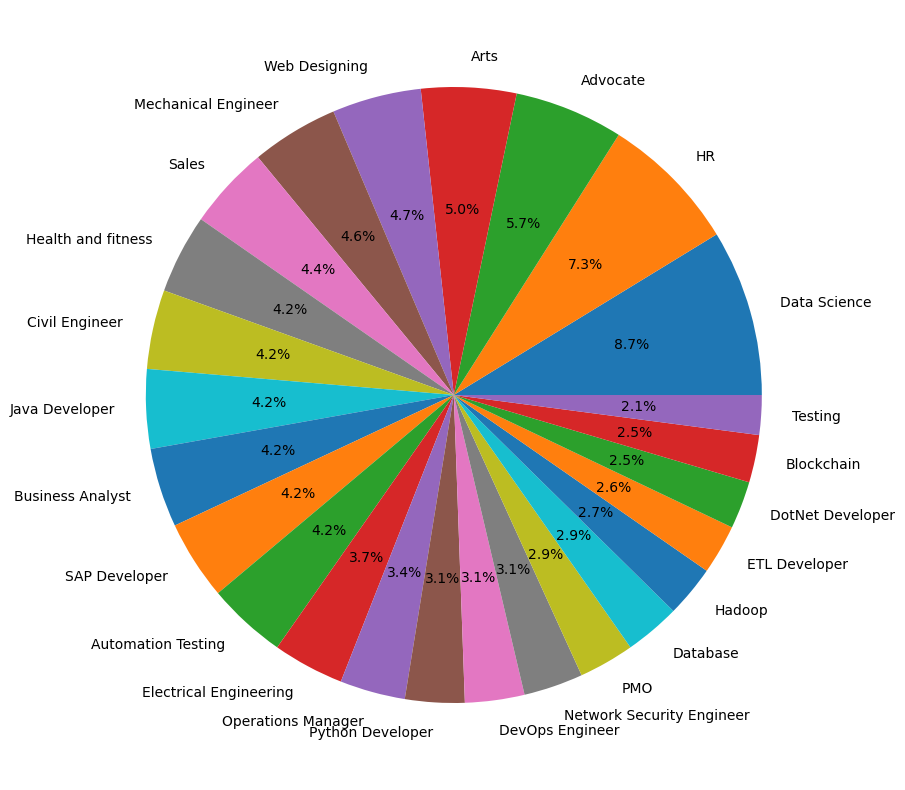

In [34]:
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct='%1.1f%%');
plt.show()

In [35]:
df['Category'][0]

'Data Science'

In [36]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [37]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [3]:
#preprocessing
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', ' ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [41]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

'my is hasnain pirzada'

In [44]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [45]:
#encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [53]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [54]:
#tfidf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

In [59]:
#splitting
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size= 0.2, random_state = 42)

In [62]:
X_train.shape

(769, 7351)

In [66]:
X_test.shape

(193, 7351)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

ypred = clf.predict(X_test)

print(accuracy_score(y_test, ypred))

0.9844559585492227


In [72]:
import pickle

pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [1]:
myresume = """
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, 
JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, 
Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, 
Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. 
* Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana,
matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask,
Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science 
Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 
24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigations
and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR (Technology Assisted Review) assists in accelerating the 
review process and run analytics and generate reports.\r\n* Core member of a team helped in developing automated review platfor
m tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating 
reviews, resulting in reduced labor costs and time spent during the lawyers review.\r\n* Understand the end to end flow of the 
solution, doing research and development for classification models, predictive analysis and mining of the information present 
in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.\r\n* TAR assists in predictive 
coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify "red
flags" and fraud-related issues.\r\n\r\nTools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, NaÃ¯ve Bayes,
LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplot lib, Tableau dashboard for reporting.\r\n\r\nMULTIPLE DATA SCIENCE AND ANALYTIC P
ROJECTS (USA CLIENTS)\r\nTEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. 
Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.\r\n*
Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the
Survey categories and plotted Word cloud.\r\n* Created customized tableau dashboards for effective reporting and visualizations.
\r\nCHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, 
reservation options and so on.\r\n* This chat bot serves entire product related questions. Giving overview of tool via QA platf
orm and also give recommendation responses so that user question to build chain of relevant answer.\r\n* This too has intellig
ence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.\r\n\r\nTools & Technologies: Python,
Natural language processing, 
NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer\r\n\r\nINFORMATIO
N GOVERNANCE\r\nOrganizations to make informed decisions about all of the information they store. The integrated Information G
overnance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations a
re best positioned to counter information risk.\r\n* Scan data from multiple sources of formats and parse different file format
s, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using
kibana.\r\n* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Red
undant, Outdated, or Trivial.\r\n* Preforming full-text search analysis on elastic
search with predefined methods which can tag as (PII) personally identifiable information 
(social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.\r\nTools & 
Technologies: Python, Flask, Elastic Search, Kibana\r\n\r\nFRAUD ANALYTIC PLATFORM\r\nFraud Analytics and investigative 
platform to review all red flag cases.\r\nâ\x80¢ FAP is a Fraud Analytics and investigative platform with inbuilt case manager 
and suite of Analytics for various ERP systems.\r\n* It can be used by clients to interrogate their Accounting systems for 
identifying the anomalies which can be indicators of fraud by running advanced analytics\r\nTools & Technologies: HTML, 
JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js
"""

In [4]:
import pickle

clf = pickle.load(open('clf.pkl', 'rb'))
tfidf = pickle.load(open('tfidf.pkl', 'rb'))
clean_resume = cleanResume(myresume)

input_features = tfidf.transform([clean_resume])

prediction_id = clf.predict(input_features)[0]

cat = {
    6: 'Data Science',
    12: 'HR',
    0: 'Advocate',
    1: 'Arts',
    24: 'Web Desinging',
    16: 'Mechanical Engineer',
    22: 'Sales',
    14: 'Health and fitness',
    5: 'Civil Engineer',
    15: 'Java Developer',
    4: 'Business Analyst',
    21: 'SAP Developer',
    2: 'Automation Testing',
    11: 'Electrical Engineering',
    18: 'Operations Manager',
    20: 'Python Developer',
    8: 'DevOps Engineer',
    17: 'Network Security Engineer',
    19: 'PMO',
    7: 'Database',
    13: 'Hadoop',
    10: 'ETL Developer',
    9:'DotNet Develpor',
    3:'Blockchain',
    23: 'Testing'
    
}

category_name = cat.get(prediction_id, "Unknown")
print("Predicted Category:" , category_name)

Predicted Category: Data Science


In [10]:
import ipywidgets as widgets
from IPython.display import display
import PyPDF2
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained model and TFIDF vectorizer
clf = pickle.load(open('clf.pkl', 'rb'))
tfidf = pickle.load(open('tfidf.pkl', 'rb'))

# Function to clean and preprocess the resume text
def clean_resume(text):
    # Implement your text cleaning function here
    return text

# Function to extract text from PDF
def extract_text_from_pdf(file_content):
    pdf_reader = PyPDF2.PdfFileReader(file_content)
    text = ""
    for page_num in range(pdf_reader.getNumPages()):
        text += pdf_reader.getPage(page_num).extract_text()
    return text

# Define category mapping
cat = {
    6: 'Data Science',
    12: 'HR',
    0: 'Advocate',
    1: 'Arts',
    24: 'Web Designing',
    16: 'Mechanical Engineer',
    22: 'Sales',
    14: 'Health and fitness',
    5: 'Civil Engineer',
    15: 'Java Developer',
    4: 'Business Analyst',
    21: 'SAP Developer',
    2: 'Automation Testing',
    11: 'Electrical Engineering',
    18: 'Operations Manager',
    20: 'Python Developer',
    8: 'DevOps Engineer',
    17: 'Network Security Engineer',
    19: 'PMO',
    7: 'Database',
    13: 'Hadoop',
    10: 'ETL Developer',
    9: 'DotNet Developer',
    3: 'Blockchain',
    23: 'Testing'
}

# Create file upload widget
upload = widgets.FileUpload(accept='.pdf', multiple=False)
output = widgets.Output()

# Define a function to handle the file upload
def on_upload_change(change):
    # Clear previous output
    output.clear_output()
    
    with output:
        # Check if a file has been uploaded
        if not upload.value:
            print("No file uploaded")
            return
        
        # Get the uploaded file
        file_info = list(upload.value.values())[0]
        file_content = file_info['content']
        
        # Extract text from PDF
        resume_text = extract_text_from_pdf(file_content)
        
        # Clean and preprocess the resume text
        clean_resume_text = cleanResume(resume_text)
        
        # Transform the resume text to TFIDF features
        input_features = tfidf.transform([clean_resume_text])
        
        # Predict the category
        prediction_id = clf.predict(input_features)[0]
        category_name = cat.get(prediction_id, "Unknown")
        
        # Display the predicted category
        print(f"Predicted Category: {category_name}")

# Attach the file upload handler to the upload widget
upload.observe(on_upload_change, names='value')

# Display the file upload widget and output area
display(upload, output)


FileUpload(value=(), accept='.pdf', description='Upload')

Output()